In [2]:
import os.path
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn.neighbors import KernelDensity
plt.close("all")

In [3]:
air_quality = pd.read_csv("air_quality.csv") 

(a) We want to plot the heatmap of the dataset. 

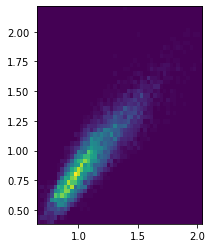

In [4]:
x = air_quality.iloc[:, 0]
y = air_quality.iloc[:, 1]

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(heatmap.T, extent=extent, origin='lower')

(b) We want the plot the estimated probability density function applying a 2D Gaussian Kernel (i) using the first 50 data points and (ii) using the whole dataset.  You can try multiple bandwidths, but be sure to include one plot using bandwidth h=0.05.

2D gaussian Kernel using first 50 data points with bandwidth = 0.05:


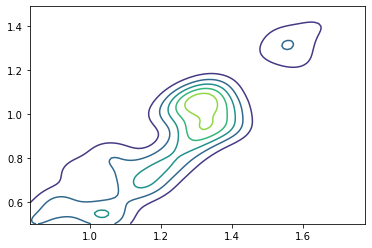

In [5]:
def kde2D(x, y, bandwidth, xbins=100j, ybins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins, 
                      y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)

xx1, yy1 ,zz1 = kde2D(x.iloc[0:49,],y.iloc[0:49,],0.05)
print('2D gaussian Kernel using first 50 data points with bandwidth = 0.05:')
plt.contour(xx1, yy1, zz1);

2D Gaussian Kernel using all data points with bandwidth = 0.05:


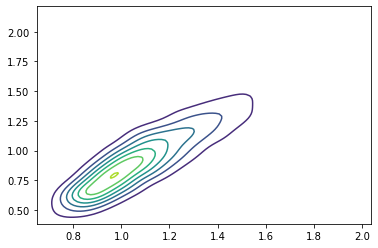

In [6]:
xx2, yy2, zz2 = kde2D(x,y,0.05)
print('2D Gaussian Kernel using all data points with bandwidth = 0.05:')
plt.contour(xx2, yy2, zz2);

2D Gaussian Kernel using all data points with bandwidth = 0.5:


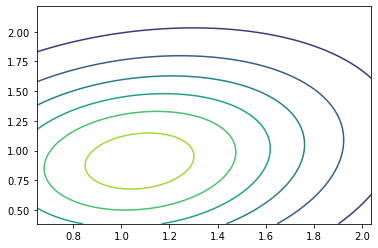

In [7]:
xx3, yy3 ,zz3 = kde2D(x,y,0.5)
print('2D Gaussian Kernel using all data points with bandwidth = 0.5:')
plt.contour(xx3, yy3, zz3);

2D Gaussian Kernel using all data points with bandwidth = 1:


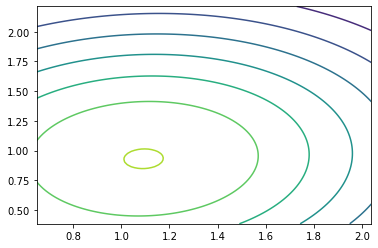

In [8]:
xx4, yy4 ,zz4 = kde2D(x,y,1)
print('2D Gaussian Kernel using all data points with bandwidth = 1:')
plt.contour(xx4, yy4, zz4);

The 2D Gaussian Kernel plot becomes more focused into the center point as the bandwidth increases.

(c) Using the pdf estimated  via  KDE  using  the  Gaussian  Kernel, we want to plot the marginal pdf of CO.

0.9973827336847761


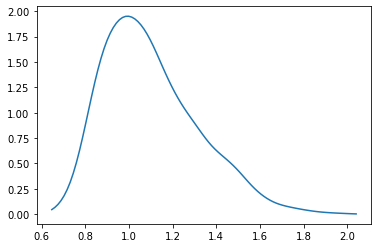

In [77]:
x = xx2[:, 0]
mpdf_co = []
x_diff = float(x[1]) - float(x[0])
y_diff = float(y[1]) - float(y[0])
pdf = zz2 * y_diff

for z in pdf:
    mpdf_co.append(np.sum(z))

print(sum(mpdf_co) * x_diff)

plt.plot(x, mpdf_co)

The plot above is the marginal pdf of CO. To create the mpdf, we used a matrix zz2 that was created by our Gaussian. The matrix zz2 has rows indexing for CO and columns indexing for NMHC. We summed up all the rows in order to get the marginal probabilities. We then scaled the probabilities so the sum of the marginal pdf would be normalizable. The x-axis is the index of CO and the y-axis is the probability density.

(d) Using the pdf estimated via KDE using the Gaussian Kernel, we want to plot the conditional pdf of NMHC given CO = 0.8. 

0.01251894541469191
0.9999999999999996


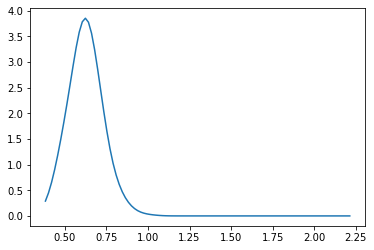

In [83]:
y = yy2[0, :]

cpdf_nmhc = []

density = zz2 * y_diff * x_diff
joint_pdf = density[11, :]
co_atvalue = sum(joint_pdf)
cpdf_nmhc = joint_pdf/(co_atvalue * y_diff)

print(sum(cpdf_nmhc) * y_diff)

plt.plot(yy, cpdf_nmhc)

The plot above is the conditional pdf of NMHC given CO = 0.8. To create the cpdf, we use Bayes' Theorem to find the conditional probability to be $P(\text{NMHC}|\text{CO} = 0.8) = \frac{P(\text{NMHC},\text{CO} = 0.8)}{P(\text{CO} = 0.8)}$. We computed the numerator by finding the index where CO = 0.8 and took the list of densities. To find the denominator, we summed up all the values of the numerator. We divide each value in the list of $P(\text{NMHC},\text{CO} = 0.8)$ by $P(\text{CO} = 0.8)$. The new list is then scaled so when we graph with the indices of NMHC, the curve is normalizable. The x-axis is the index of NMHC and the y-axis is the probability density.